In [1]:
import scanpy as sc 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bbknn
import matplotlib.pyplot as plt
sc.settings.verbosity = 0 
sc.settings.set_figure_params(dpi_save=400, facecolor='white', fontsize=7, format='jpg',dpi=100)

In [2]:
adata = sc.read_h5ad('../data/init_manual_anno-v4.h5ad')

In [ ]:
sc.pl.umap(adata, color=['leiden', 'leiden_poly'],ncols=1,save='c')


- ◎ Fibroblasts：THY1+LUM+ COL1A1+ FBLN1+
- ◎ Macrophages：CD3- CD14+
 M2：CD163+ MS4A6A+
- ◎ Fibroblast-like Synoviocytes：THY1-Clic5+ Itga6+
- ◎ Endothelial Cells：PECAM1+VWF+
- ◎ Vascular Smooth Muscle Cells：Notch3+ ACTA2+TAGLN+
- ◎ T Cells：CD2+CD3D+ 

- 0: Fibroblasts
- 1: Macrophages-M2
- 2: Fibroblast-like Synoviocytes
- 3: Endothelial Cells
- 4: Vascular Smooth Muscle Cells
- 6: Macrophages-M2

In [ ]:
fib_marker = [ 'LUM','IGFBP6', 'COL1A1','ASPN', 'FBLN1', 'THY1'] # Fibroblasts
macr_marker = ['MS4A6A', 'CD163', 'CD14', 'CYBB',] # Macrophages-m2
fib_syn_marker = [ 'CLIC5',  'HBEGF'] # Fibroblast-like Synoviocytes
end_marker = ['PTPRB', 'VWF', 'EMCN', 'ADGRL4'] # Endothelial Cells
VSMC_marker = ['NOTCH3', 'ACTA2', 'TAGLN', 'TPM2'] # Vascular Smooth Muscle Cells
TC_marker = ['CD2', 'CD3D'] # T Cells
marker_genes = fib_syn_marker + fib_marker + macr_marker + TC_marker+ end_marker + VSMC_marker 


# marker_genes = list(np.unique(marker_genes))

/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


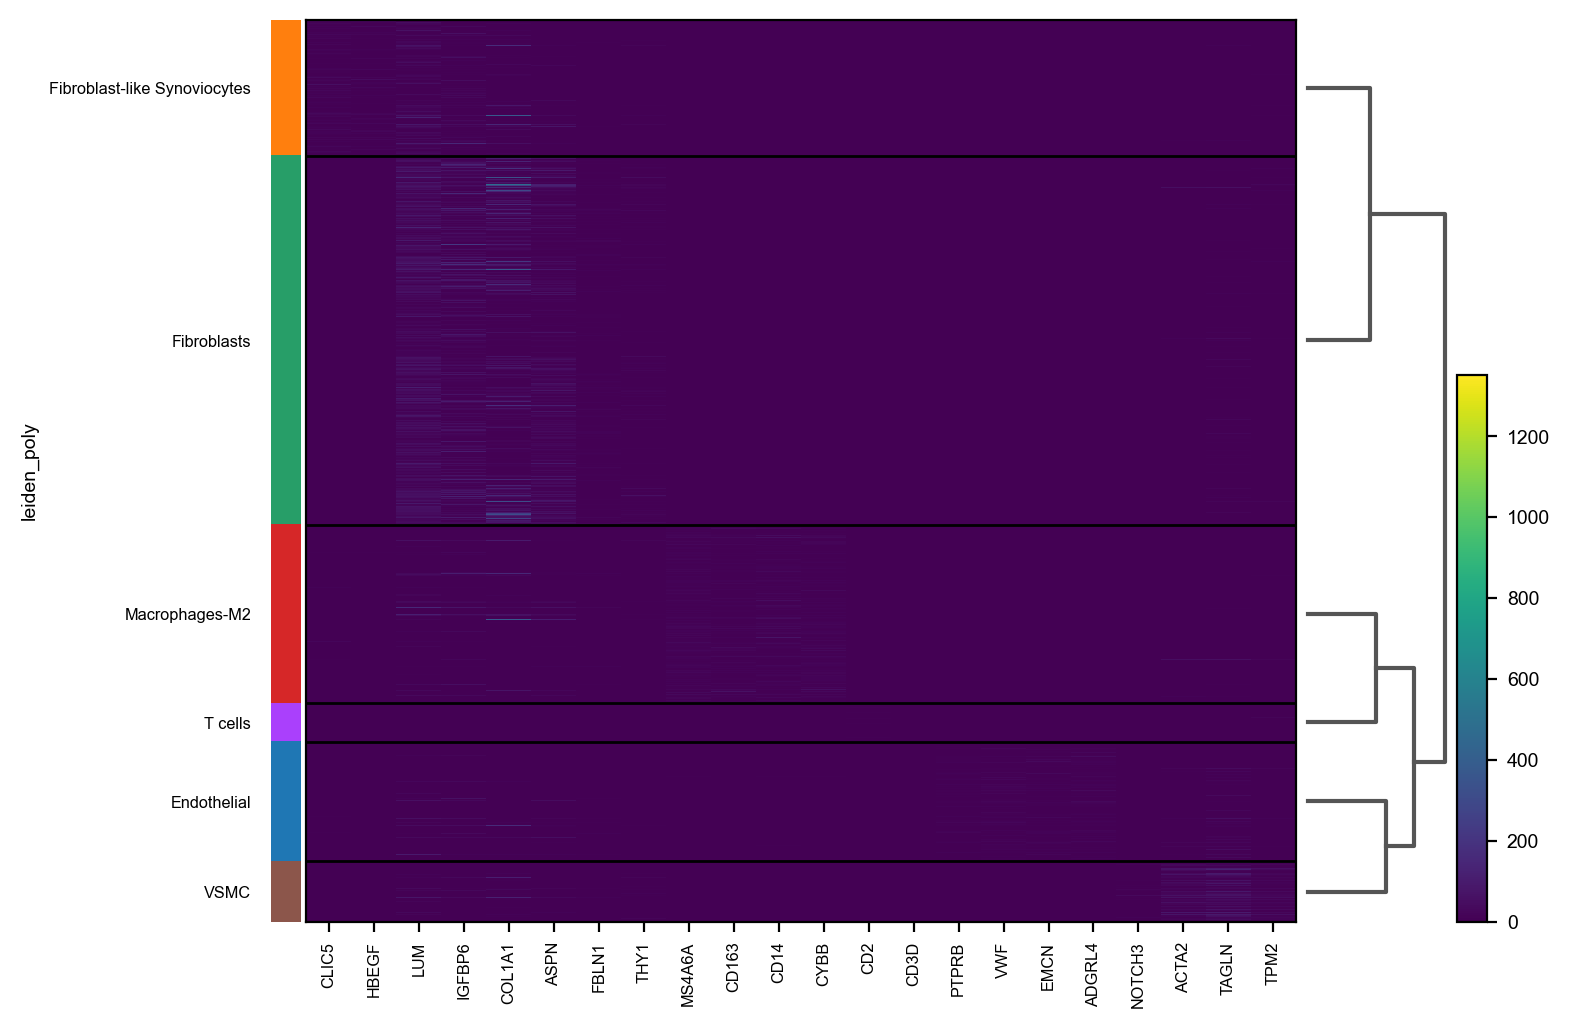

In [5]:
sc.pl.heatmap(adata, marker_genes, groupby='leiden_poly',save='_prove_marker', dendrogram=True)

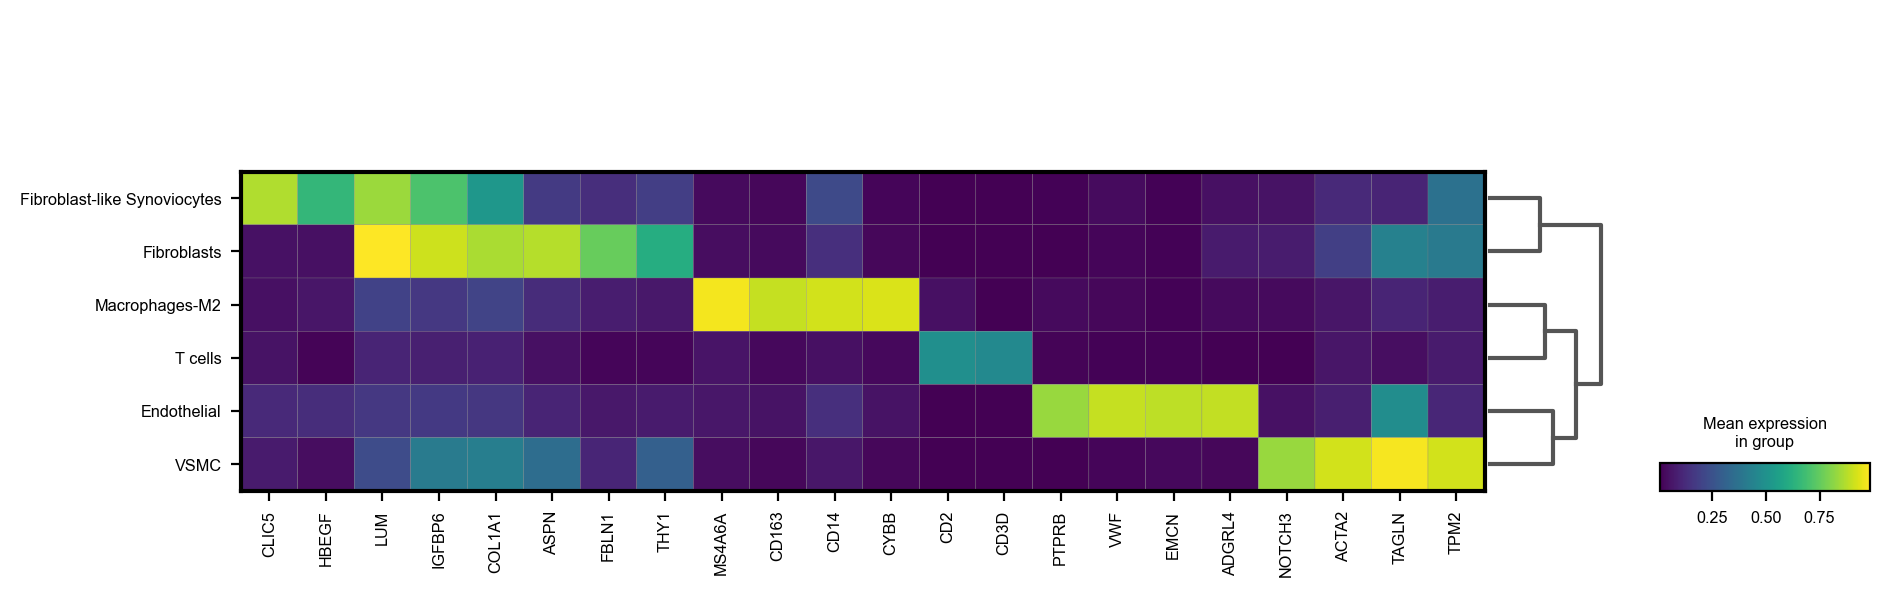

In [7]:
sc.pl.matrixplot(adata, marker_genes, groupby='leiden_poly',standard_scale=1,save='_prove_marker', dendrogram=True)

In [8]:
# sc.pl.stacked_violin(adata, marker_genes, groupby='leiden_poly',save='_prove_marker', dendrogram=True,standard_scale=1)

In [9]:
# sc.pl.tracksplot(adata, marker_genes, groupby='leiden_poly', dendrogram=True,
#                                   save='_prove_marker',standard_scale=1)

In [10]:
# sc.pl.dotplot(adata, marker_genes, groupby='leiden_poly', save='_prove_marker',dendrogram=True)

In [11]:
# sc.pl.rank_genes_groups_dotplot(adata, var_names=marker_genes, groupby='leiden_poly',dendrogram=True,save='_prove_marker')

# check clustering

In [12]:
# sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, cmap='Blues',groupby='leiden_poly',dendrogram=True,
#                                   save='_prove_cluster')

In [13]:
# sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, dendrogram=True,swap_axes=True, figsize=(6, 10), width=0.4,groupby='leiden_poly',
#                                       save='_prove_cluster')

In [15]:
# sc.pl.rank_genes_groups_heatmap(adata, n_genes=2, standard_scale='var',groupby='leiden_poly',dendrogram=True,save='_prove_cluster')

In [16]:
# sc.pl.rank_genes_groups_heatmap(adata, n_genes=2, use_raw=False, swap_axes=True, show_gene_labels=False,
#                                 vmin=-3, vmax=3, cmap='bwr',groupby='leiden_poly',save='_prove_cluster')

In [17]:
# sc.pl.rank_genes_groups_tracksplot(adata, n_genes=2,groupby='leiden_poly',save='_prove_cluster')

In [18]:
# sc.pl.correlation_matrix(adata, 'leiden_poly',save='_prove_cluster')

# By group

In [19]:
val = []
for x in list(adata.obs['sample']):
    if x.startswith('AF'):
        val.append('AF')
    else:
        val.append('NAF')
adata.obs['sample_group'] = np.array(val)

In [20]:
# sc.pl.umap(adata, color=['sample_group','leiden_poly'],save='_color_sampleGroup_leiden')

# count percentile

### Both AF and NAF

In [21]:
list(np.unique(adata.obs['leiden_poly']))

['Endothelial',
 'Fibroblast-like Synoviocytes',
 'Fibroblasts',
 'Macrophages-M2',
 'T cells',
 'VSMC']

In [22]:
totoal_af =  adata[adata.obs['sample_group'].isin(['AF'])].shape[0]
totoal_naf =  adata[adata.obs['sample_group'].isin(['NAF'])].shape[0]
End_af = adata[adata.obs['leiden_poly'].isin(['Endothelial'])&adata.obs['sample_group'].isin(['AF'])].shape[0]
Fib_af = adata[adata.obs['leiden_poly'].isin(['Fibroblasts'])&adata.obs['sample_group'].isin(['AF'])].shape[0]
Meloid_af = adata[adata.obs['leiden_poly'].isin(['Macrophages-M2'])&adata.obs['sample_group'].isin(['AF'])].shape[0]
SMC_af = adata[adata.obs['leiden_poly'].isin(['VSMC'])&adata.obs['sample_group'].isin(['AF'])].shape[0]
ly_af = adata[adata.obs['leiden_poly'].isin(['T cells'])&adata.obs['sample_group'].isin(['AF'])].shape[0]
fibsyn_af = adata[adata.obs['leiden_poly'].isin(['Fibroblast-like Synoviocytes'])
                  &adata.obs['sample_group'].isin(['AF'])].shape[0]

End_naf = adata[adata.obs['leiden_poly'].isin(['Endothelial'])&adata.obs['sample_group'].isin(['NAF'])].shape[0]
Fib_naf = adata[adata.obs['leiden_poly'].isin(['Fibroblasts'])&adata.obs['sample_group'].isin(['NAF'])].shape[0]
Meloid_naf = adata[adata.obs['leiden_poly'].isin(['Macrophages-M2'])&adata.obs['sample_group'].isin(['NAF'])].shape[0]
SMC_naf = adata[adata.obs['leiden_poly'].isin(['VSMC'])&adata.obs['sample_group'].isin(['NAF'])].shape[0]
ly_naf = adata[adata.obs['leiden_poly'].isin(['T cells'])&adata.obs['sample_group'].isin(['NAF'])].shape[0]
fibsyn_naf = adata[adata.obs['leiden_poly'].isin(['Fibroblast-like Synoviocytes'])
                  &adata.obs['sample_group'].isin(['NAF'])].shape[0]

df = pd.DataFrame([[Fib_af/totoal_af, fibsyn_af/totoal_af , 
                    Meloid_af/totoal_af, End_af/totoal_af, SMC_af/totoal_af, ly_af/totoal_af],
                  [Fib_naf/totoal_naf,fibsyn_naf/totoal_naf, 
                   Meloid_naf/totoal_naf, End_naf/totoal_naf,  SMC_naf/totoal_naf, ly_naf/totoal_naf]],
                 columns=['Fibroblasts','Fibroblast-like Synoviocytes', 'Macrophages-M2','Endothelial', 
                          'VSMC', "T cells", ],index=['AF','NAF'])
df = df*100

In [23]:
df

,Fibroblasts,Fibroblast-like Synoviocytes,Macrophages-M2,Endothelial,VSMC,T cells
AF,50.143687,11.613669,22.752546,9.080402,3.451615,2.958081
NAF,32.723498,18.140050,17.071686,16.969278,9.609743,5.485746


In [24]:
val_af = []
tmp = 0
for i in range(df.shape[1]):
 
    tmp += df.iloc[0, i]
    tmp = round(tmp,1)
    val_af.append(tmp)
val_naf = []
tmp = 0
for i in range(df.shape[1]):
 
    tmp += df.iloc[1, i]
    tmp = round(tmp, 1)
    val_naf.append(tmp)
val_naf[-1] = 100.0

In [25]:
c0 = np.array([181, 170, 210, 255]) / 255  
c1 = np.array([70,169,224,255]) / 255   
c2 = np.array([163, 218, 202, 255]) / 255   
c3 = np.array([239,92,85,255]) / 255   
c4 = np.array([255, 180, 160, 255]) / 255  
c5 = '#c4e693' # 黄

In [26]:
df.columns

Index(['Fibroblasts', 'Fibroblast-like Synoviocytes', 'Macrophages-M2',
       'Endothelial', 'VSMC', 'T cells'],
      dtype='object')

In [27]:
df

,Fibroblasts,Fibroblast-like Synoviocytes,Macrophages-M2,Endothelial,VSMC,T cells
AF,50.143687,11.613669,22.752546,9.080402,3.451615,2.958081
NAF,32.723498,18.140050,17.071686,16.969278,9.609743,5.485746


/var/folders/0q/0x0df50j27b1w78yn0n106jc0000gp/T/ipykernel_56866/599301223.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


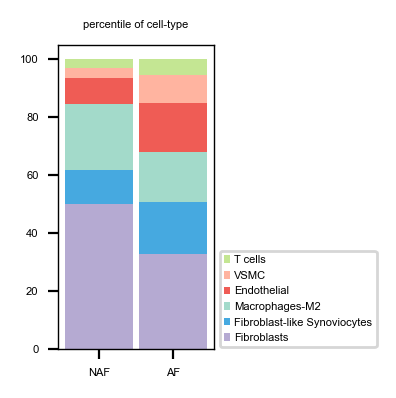

In [28]:
plt.figure(figsize=(1,2))
ax=plt.gca()
plt.bar([1], val_af[-1], width=0.2, color=c5, label='Fibroblasts')
plt.bar([1], val_af[-2], width=0.2, color=c4, label='Macrophages-M2')
plt.bar([1], val_af[-3], width=0.2, color=c3, label='Endothelial')
plt.bar([1], val_af[-4], width=0.2, color=c2, label='VSMC')
plt.bar([1], val_af[-5], width=0.2, color=c1, label='T cell')
plt.bar([1], val_af[-6], width=0.2, color=c0, label='Fibroblast-like Synoviocytes')

plt.bar([1.22], val_naf[-1], width=0.2, color=c5, label='Fibroblasts')
plt.bar([1.22], val_naf[-2], width=0.2, color=c4, label='Macrophages-M2')
plt.bar([1.22], val_naf[-3], width=0.2, color=c3, label='Endothelial')
plt.bar([1.22], val_naf[-4], width=0.2, color=c2, label='VSMC')
plt.bar([1.22], val_naf[-5], width=0.2, color=c1, label='T cell')
plt.bar([1.22], val_naf[-6], width=0.2, color=c0, label='Fibroblast-like Synoviocytes')
plt.legend(df.columns[::-1],
           bbox_to_anchor=(1.0,.34),loc='upper left', prop={'size':4})
plt.xticks([1,1.22],['NAF','AF'],size=4)
plt.yticks(size=4)
plt.grid()
thick = 0.5
ax.spines['bottom'].set_linewidth(thick );
ax.spines['left'].set_linewidth(thick );
ax.spines['right'].set_linewidth(thick );
ax.spines['top'].set_linewidth(thick );
plt.title('percentile of cell-type',size=4)
plt.tight_layout()
plt.savefig('./figures/cell_pertencile.pdf',dpi=200, bbox_inches='tight')
plt.show()

In [29]:
adata.write('../data/manual_plot4.h5ad')